In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
math_students = pd.read_csv('student-alcohol-consumption/student-mat.csv')
math_students_trimmed_cols = math_students[['sex', 'age', 'Dalc', 'Walc', 'Medu', 'Fedu', 'studytime', 'romantic', 'G3']]
math_students.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [10]:
portuguese_students = pd.read_csv('student-alcohol-consumption/student-por.csv')
portuguese_students_trimmed_cols = portuguese_students[['sex', 'age', 'Dalc', 'Walc', 'Medu', 'Fedu', 'studytime', 'romantic', 'G3']]
portuguese_students_trimmed_cols.head()

,sex,age,Dalc,Walc,Medu,Fedu,studytime,romantic,G3
0,F,18,1,1,4,4,2,no,11
1,F,17,1,1,1,1,2,no,11
2,F,15,2,3,1,1,2,no,12
3,F,15,1,1,4,2,3,yes,14
4,F,16,1,2,3,3,2,no,13


In [11]:
combined_data = pd.concat([math_students_trimmed_cols, portuguese_students_trimmed_cols], ignore_index=True)
combined_data.head()
combined_data.to_csv('combined.csv') 

,sex,age,Dalc,Walc,Medu,Fedu,studytime,romantic,G3
0,F,18,1,1,4,4,2,no,6
1,F,17,1,1,1,1,2,no,6
2,F,15,2,3,1,1,2,no,10
3,F,15,1,1,4,2,3,yes,15
4,F,16,1,2,3,3,2,no,10


In [12]:
final_df = pd.get_dummies(combined_data)
final_df.head()

,age,Dalc,Walc,Medu,Fedu,studytime,G3,sex_F,sex_M,romantic_no,romantic_yes
0,18,1,1,4,4,2,6,1,0,1,0
1,17,1,1,1,1,2,6,1,0,1,0
2,15,2,3,1,1,2,10,1,0,1,0
3,15,1,1,4,2,3,15,1,0,0,1
4,16,1,2,3,3,2,10,1,0,1,0


In [14]:
X = final_df[['sex_F', 'sex_M', 'romantic_no', 'romantic_yes', 'age', 'Dalc', 'Walc', 'Medu', 'Fedu', 'studytime']]
y = final_df['G3'].values.reshape(-1, 1)
print(X.shape, y.shape)

(1044, 10) (1044, 1)


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [16]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [17]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

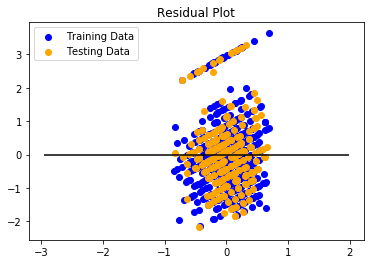

In [19]:
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [20]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9373738581734842, R2: 0.08467986538549543
